In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10,10)})

In [9]:
df = pd.read_csv('train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df['Loan_ID'].value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [10]:
df.drop('Loan_ID', axis = 1 , inplace = True)


In [7]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [9]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [4]:
# df['Dependents'] = df['Dependents'].apply(lambda r : int(r[0]) if r == '3+' else r)

In [4]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

### Univariate Analysis

In [13]:
data =df
def SelectedApprovedPie(feature,Limit=10) : 
    global data
    fig, ax = plt.subplots(figsize=(15,4))
    
    plt.subplot(1,2,1)
    plt.title('Approved')
    Data = data[data['Loan_Status']=='Y']
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(
        Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )
  
    plt.subplot(1,2,2)
    plt.title('Not Approved')
    Data = data[data['Loan_Status']=='N']
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(
        Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )
    plt.show()        

#### Gender :

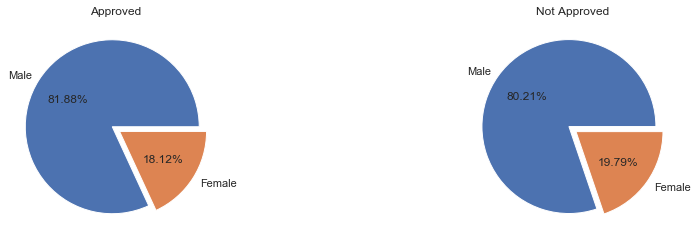

In [14]:
SelectedApprovedPie('Gender')

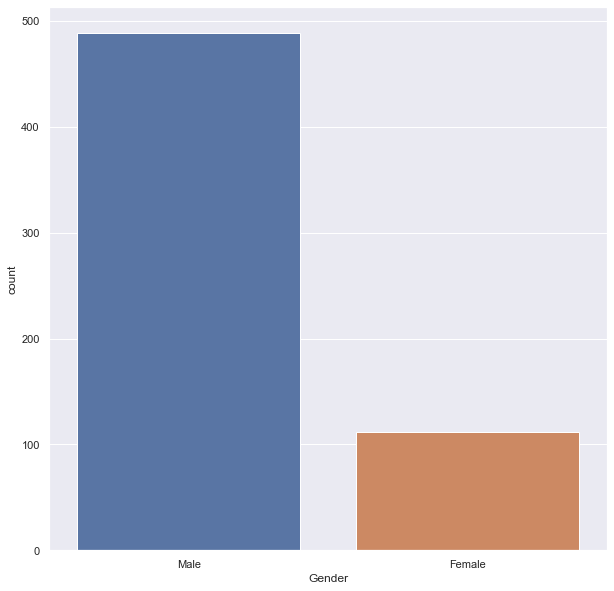

In [15]:
sns.countplot(data=df , x='Gender')

#### Married :

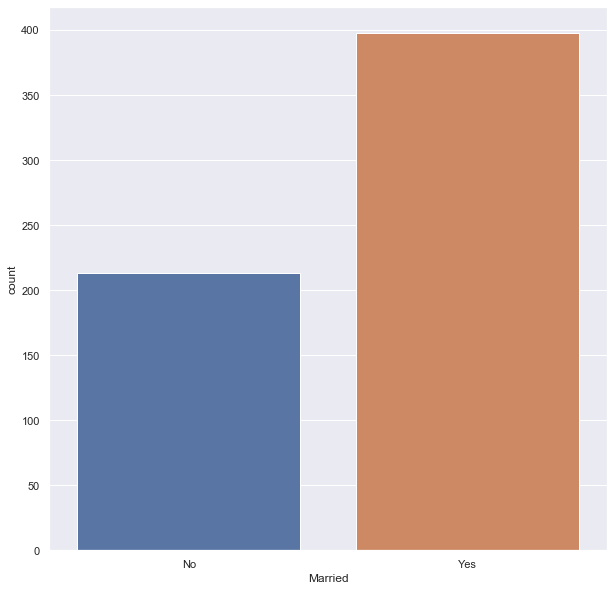

In [16]:
sns.countplot(data=df , x='Married')

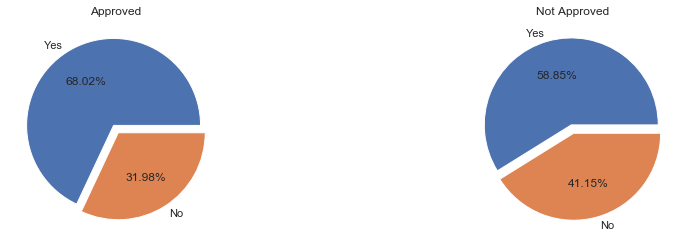

In [17]:
SelectedApprovedPie('Married')

####  Dependents:

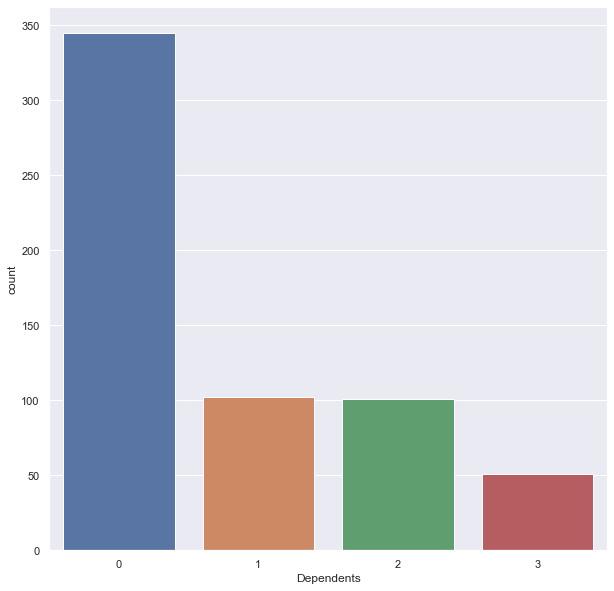

In [18]:
sns.countplot(data=df , x='Dependents')

#### Education:

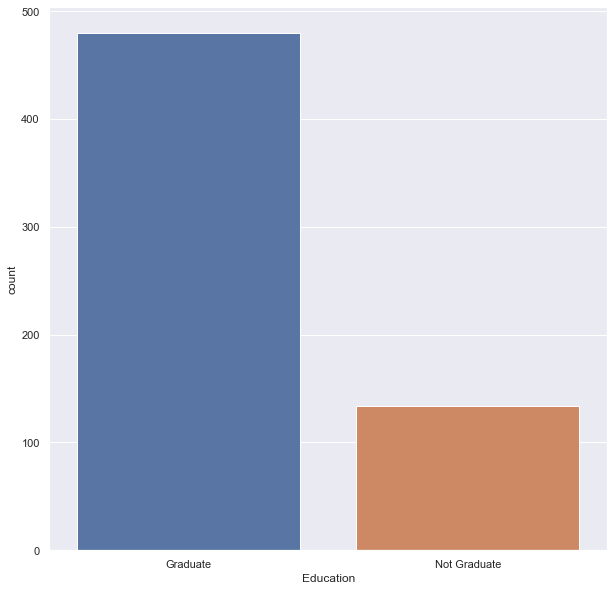

In [19]:
sns.countplot(data=df , x='Education')

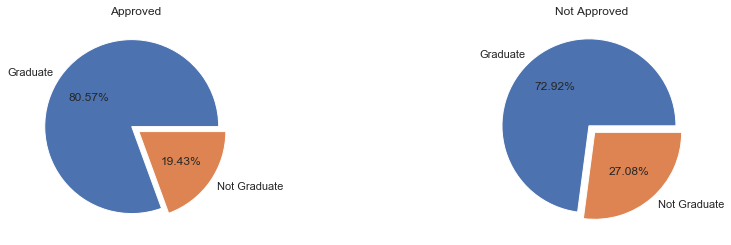

In [20]:
SelectedApprovedPie("Education")

#### Self Employed:

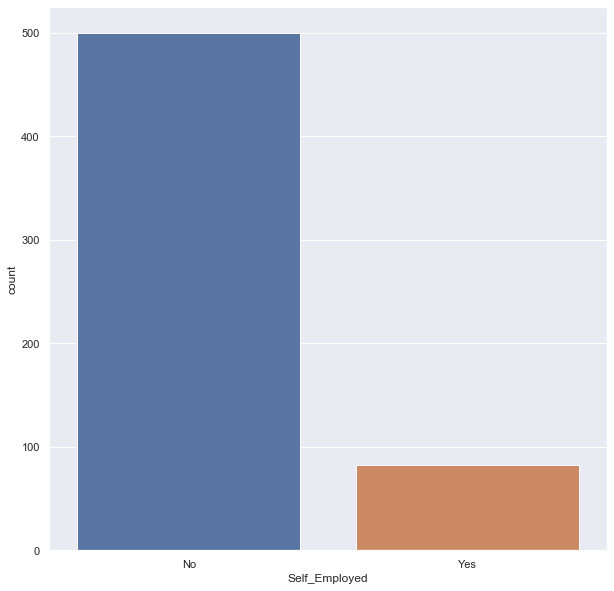

In [21]:
sns.countplot(data=df , x='Self_Employed')

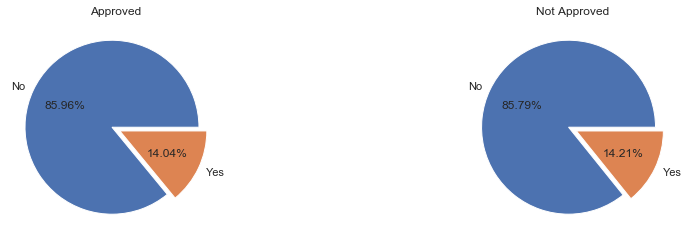

In [22]:
SelectedApprovedPie("Self_Employed")

#### Property Area:

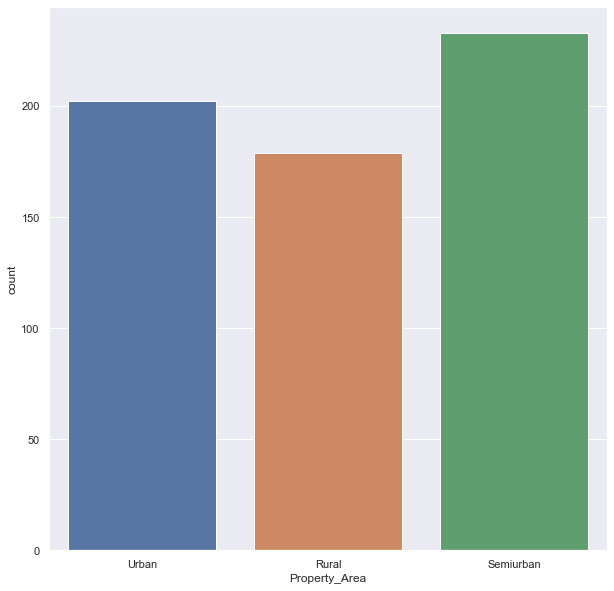

In [23]:
sns.countplot(data=df , x='Property_Area')

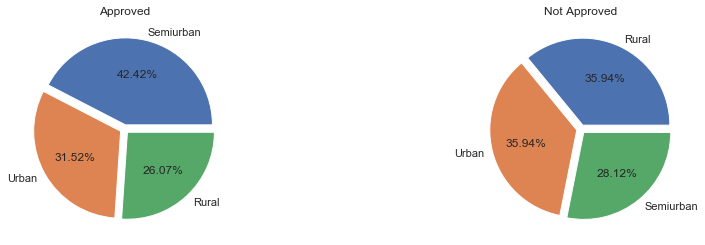

In [24]:
SelectedApprovedPie("Property_Area")

#### Loan Status (Label):

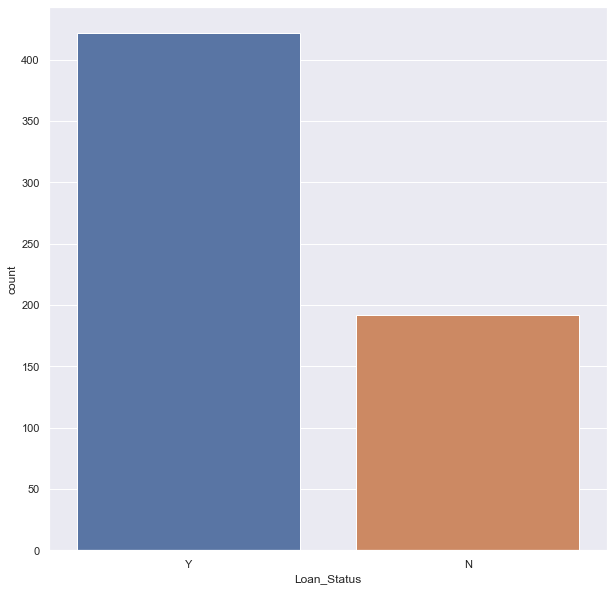

In [25]:
sns.countplot(data=df , x='Loan_Status')

In [26]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


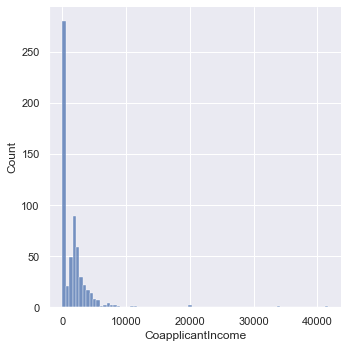

In [27]:
sns.displot(data = df , x ="CoapplicantIncome")

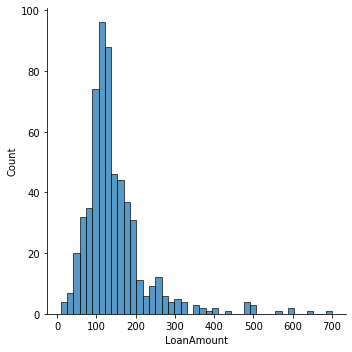

In [8]:
sns.displot(data = df , x ="LoanAmount")

## Outliers:

In [124]:
threshold = 3
outlier = []
data = df
for i in data['ApplicantIncome']:
    z = (i-data['ApplicantIncome'].mean())/data['ApplicantIncome'].std()
    print(z)
    if abs(z) > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)


0.07293135984867927
-0.13430245319192863
-0.3934265653904138
-0.4616860440933629
0.09764882096173755
0.0022165042139694682
-0.5026089929560421
-0.387533660754188
-0.22875261916699238
1.2174643936400935
-0.3606882063002704
-0.47527246311577237
-0.3814770643225115
-0.5811810547723864
-0.6718663094520837
-0.07422756426151543
-0.2958662553017864
-0.3099437497105481
-0.08454014737491061
-0.45890328357070065
0.36937720140992797
0.09028269016645528
-0.45890328357070065
-0.3336790600509021
-0.27605954805224964
0.6803916127662906
-0.426328616276008
-0.19274042416783463
-0.6484583827026311
-0.270657718802376
-0.20256193189487764
-0.3660900355501441
-0.11646004748780045
-0.31158066766505527
1.161645491391399
-0.5121031170921837
-0.5852733496586543
-0.2842441378247855
-0.20256193189487764
-0.2709851023932774
-0.29521148811998354
-0.5898567199312744
-0.4916416426608441
-0.239392585871289
-0.1159689721014483
-0.3263129292556198
0.040193000758535845
0.06834798957605918
-0.4515371527754184
-0.22973476

-0.39064380486775163
-0.4314030619349802
-0.3348249026190571
-0.47101647643405375
-0.06604297448897957
-0.428620301412318
0.2012657274820415
-0.4765819974793781
-0.338917197505325
-0.48280228570650535
-0.2963573306881386
0.010564785781956042
-0.44793593327550263
0.7751691623322557
-0.24823194282562774
-0.2002702467585676
-0.28293460346117977
2.304868990819207
0.08504455271203233
0.06491046187159413
0.5558221564282948
-0.1532907014642118
-0.338917197505325
-0.327949847210127
-0.49524286216075986
-0.3662537273455948
-0.3251670866874648
-0.04705472621669639
1.8435855112390862
0.1181102953930772
0.1641076899147287
-0.3673995699137498
-0.37918537918620143
-0.3559411442321996
-0.5928031722493873
-0.3636346586183833
0.1860423905051248
-0.5839638152950486
-0.3662537273455948
-0.576761376295217
-0.4282929178214166
-0.18340999182714376
-0.5085018975922679
-0.5301092145917626
-0.10696592335165886
-0.4382781173439103
-0.3934265653904138
0.09764882096173755
0.6471621782897949
-0.25281531309824784
1

### Transforming load amount terms into years:

In [11]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'] / 12

In [12]:
df['Loan_Amount_Term'].value_counts()

30.0    512
15.0     44
40.0     15
25.0     13
20.0      4
7.0       4
10.0      3
5.0       2
3.0       2
1.0       1
Name: Loan_Amount_Term, dtype: int64

In [13]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y


### Bivariate analysis

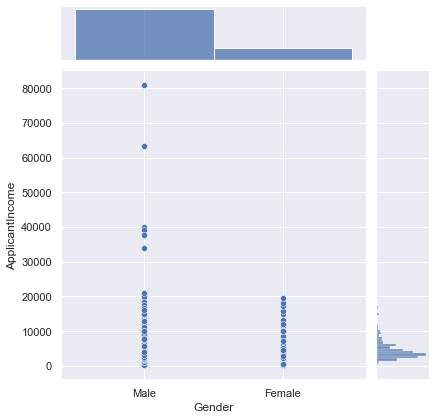

In [32]:
sns.jointplot(data = df , x='Gender' , y='ApplicantIncome', kind='scatter' )

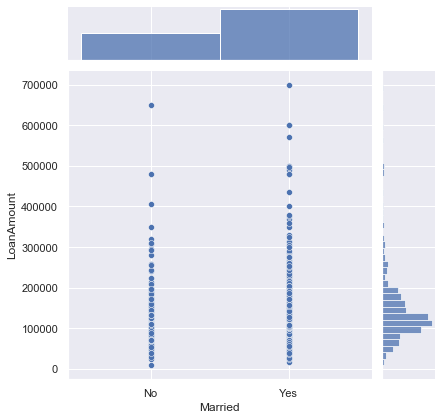

In [33]:
sns.jointplot(data = df , x='Married' , y='LoanAmount', kind='scatter' )

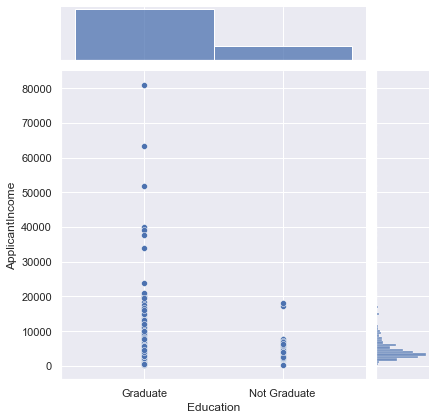

In [34]:
sns.jointplot(data = df , x='Education' , y='ApplicantIncome', kind='scatter' )

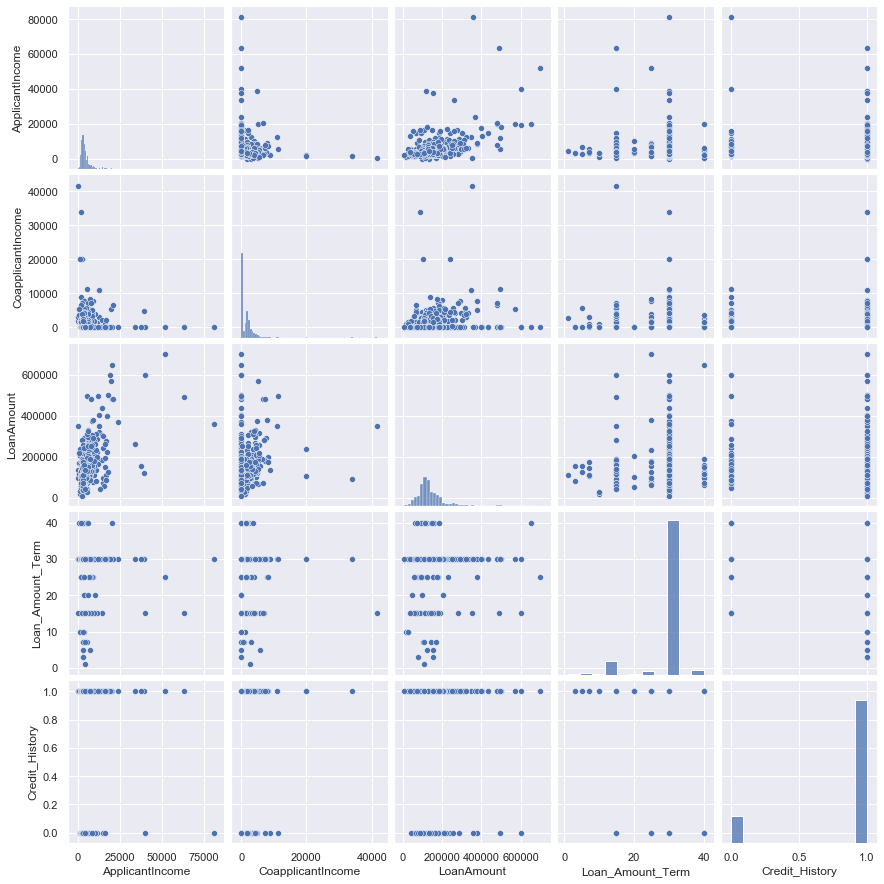

In [35]:
sns.pairplot(df)

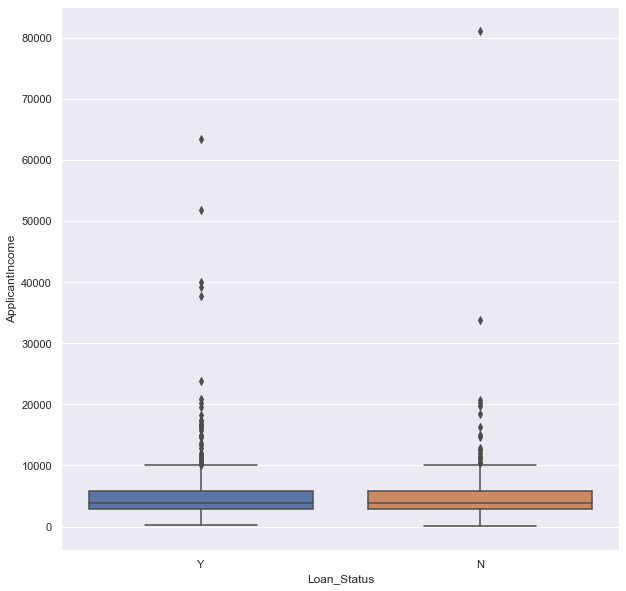

In [36]:
sns.boxplot(data=df , x='Loan_Status', y='ApplicantIncome')

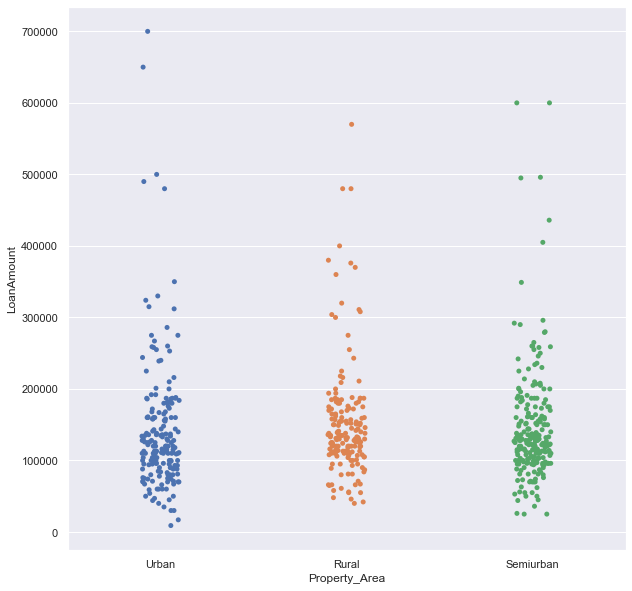

In [37]:
sns.stripplot(data=df, x='Property_Area', y='LoanAmount')

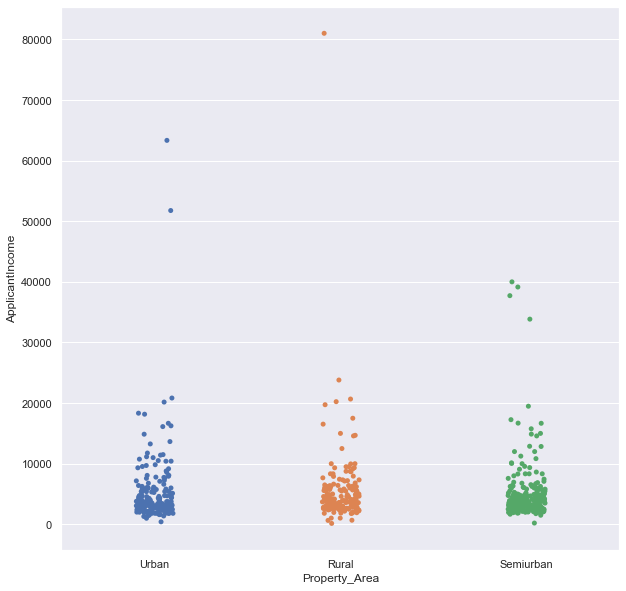

In [38]:
sns.stripplot(data=df, x='Property_Area', y='ApplicantIncome')

In [39]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.000000,564.000000
mean,5403.459283,1621.245798,146412.162162,28.500000,0.842199
std,6109.041673,2926.248369,85587.325236,5.426701,0.364878
min,150.000000,0.000000,9000.000000,1.000000,0.000000
25%,2877.500000,0.000000,100000.000000,30.000000,1.000000
50%,3812.500000,1188.500000,128000.000000,30.000000,1.000000
75%,5795.000000,2297.250000,168000.000000,30.000000,1.000000
max,81000.000000,41667.000000,700000.000000,40.000000,1.000000


In [40]:
df[ df['ApplicantIncome'] > 50000 ]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,NaN,Yes,3,Graduate,No,51763,0.0,700000.0,25.0,1.0,Urban,Y
333,Male,Yes,0,Graduate,NaN,63337,0.0,490000.0,15.0,1.0,Urban,Y
409,Male,Yes,3,Graduate,No,81000,0.0,360000.0,30.0,0.0,Rural,N


#### what are the top 5 loan amounts?

In [41]:
df['LoanAmount'].sort_values(ascending=False).head(5)

171    700000.0
130    650000.0
155    600000.0
561    600000.0
369    570000.0
Name: LoanAmount, dtype: float64

#### what are the top 5 applicant income?

In [42]:
df['ApplicantIncome'].sort_values(ascending=False).head(5)

409    81000
333    63337
171    51763
155    39999
185    39147
Name: ApplicantIncome, dtype: int64

### Data Cleaning

In [43]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### CoapplicantIncome analysis

In [45]:
df[df['CoapplicantIncome'] > 2300 ]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,30.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267000.0,30.0,1.0,Urban,Y
7,Male,Yes,3,Graduate,No,3036,2504.0,158000.0,30.0,0.0,Semiurban,N
9,Male,Yes,1,Graduate,No,12841,10968.0,349000.0,30.0,1.0,Semiurban,N
12,Male,Yes,2,Graduate,No,3073,8106.0,200000.0,30.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
600,Female,No,3,Graduate,NaN,416,41667.0,350000.0,15.0,NaN,Urban,N
601,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155000.0,30.0,1.0,Rural,Y
603,Male,No,0,Graduate,No,3676,4301.0,172000.0,30.0,1.0,Rural,Y
605,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,15.0,1.0,Urban,N


In [46]:
df[df['CoapplicantIncome'] == 0]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y
2,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,30.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141000.0,30.0,1.0,Urban,Y
15,Male,No,0,Graduate,No,4950,0.0,125000.0,30.0,1.0,Urban,Y
16,Male,No,1,Not Graduate,No,3596,0.0,100000.0,20.0,NaN,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
604,Female,Yes,1,Graduate,No,12000,0.0,496000.0,30.0,1.0,Semiurban,Y
609,Female,No,0,Graduate,No,2900,0.0,71000.0,30.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40000.0,15.0,1.0,Rural,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187000.0,30.0,1.0,Urban,Y


In [47]:
df[ (df['CoapplicantIncome'] != 0) & (df['Loan_Status'] == 'N')]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,30.0,1.0,Rural,N
7,Male,Yes,3,Graduate,No,3036,2504.0,158000.0,30.0,0.0,Semiurban,N
9,Male,Yes,1,Graduate,No,12841,10968.0,349000.0,30.0,1.0,Semiurban,N
13,Male,No,0,Graduate,No,1853,2840.0,114000.0,30.0,1.0,Rural,N
22,Male,Yes,0,Not Graduate,No,2600,1911.0,116000.0,30.0,0.0,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
584,Male,Yes,1,Graduate,No,2787,1917.0,146000.0,30.0,0.0,Rural,N
585,Male,Yes,1,Graduate,No,4283,3000.0,172000.0,7.0,1.0,Rural,N
596,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187000.0,30.0,1.0,Rural,N
600,Female,No,3,Graduate,NaN,416,41667.0,350000.0,15.0,NaN,Urban,N


In [48]:
df[df['CoapplicantIncome'] == 0]['Loan_Status'].value_counts()

Y    177
N     96
Name: Loan_Status, dtype: int64

In [14]:
df['Gender'] = df['Gender'].apply(lambda g : 1 if g == 'Male' else 0)

In [15]:
df['Married'] = df['Married'].apply(lambda m : 1 if m == 'Yes' else 0)

In [16]:
df['Education'] = df['Education'].apply(lambda e : 1 if e=='Graduate' else 0)

In [17]:
df['Self_Employed'] = df['Self_Employed'].apply(lambda se : 1 if se == 'Yes' else 0)

In [18]:
df['Loan_Status'] = df['Loan_Status'].apply(lambda ls : 1 if ls == 'Y' else 0)

In [19]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,NaN,30.0,1.0,Urban,1
1,1,1,1,1,0,4583,1508.0,128.0,30.0,1.0,Rural,0
2,1,1,0,1,1,3000,0.0,66.0,30.0,1.0,Urban,1
3,1,1,0,0,0,2583,2358.0,120.0,30.0,1.0,Urban,1
4,1,0,0,1,0,6000,0.0,141.0,30.0,1.0,Urban,1


In [20]:
df['LoanAmount'] = df['LoanAmount'] * 1000

In [21]:
df['total_income'] = df['CoapplicantIncome'] + df['ApplicantIncome']

In [22]:
df['monthly_amount'] = df['LoanAmount'] / df['Loan_Amount_Term']

In [23]:
df.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
total_income          0
monthly_amount       36
dtype: int64

In [24]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [25]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,monthly_amount
0,1,0,0,1,0,5849,0.0,NaN,30.0,1.0,Urban,1,5849.0,NaN
1,1,1,1,1,0,4583,1508.0,128000.0,30.0,1.0,Rural,0,6091.0,4266.666667
2,1,1,0,1,1,3000,0.0,66000.0,30.0,1.0,Urban,1,3000.0,2200.000000
3,1,1,0,0,0,2583,2358.0,120000.0,30.0,1.0,Urban,1,4941.0,4000.000000
4,1,0,0,1,0,6000,0.0,141000.0,30.0,1.0,Urban,1,6000.0,4700.000000


In [27]:
df_train = df.drop(['ApplicantIncome','CoapplicantIncome', 'LoanAmount' , 'Loan_Amount_Term'],axis=1)

In [28]:
df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status', 'total_income',
       'monthly_amount'],
      dtype='object')

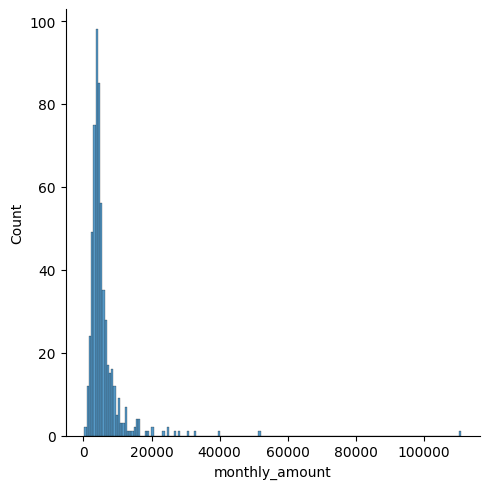

In [29]:
sns.displot(data = df_train , x ="monthly_amount")

In [30]:
cols = ['total_income',
       'monthly_amount']
for col in cols:
    df_train[col] = np.log(df_train[col])

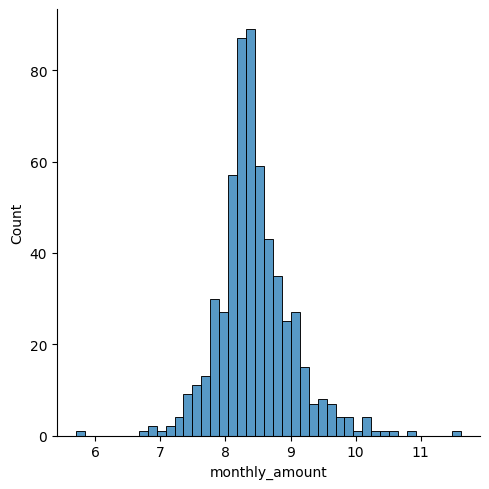

In [31]:
sns.displot(data = df_train , x ="monthly_amount")

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , RobustScaler
from category_encoders.binary import BinaryEncoder
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

In [50]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [51]:
from sklearn.impute import KNNImputer

In [52]:
from sklearn.model_selection import train_test_split

In [92]:
x = df_train.drop("Loan_Status" , axis = 1)
y = df_train['Loan_Status']

In [54]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [55]:
models = list()
models.append(("LR" , LogisticRegression()))
models.append(("KNN" , KNeighborsClassifier()))
models.append(("CART" , DecisionTreeClassifier()))
models.append(("RF" , RandomForestClassifier()))
models.append(("xg" , XGBClassifier()))
models.append(("GB" , GradientBoostingClassifier()))
models.append(("SGD" , SGDClassifier()))
models.append(("SVC" , SVC()))

In [56]:
Sampler = SMOTETomek(random_state=42)

In [57]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,total_income,monthly_amount
0,1,0,0,1,0,1.0,Urban,8.674026,NaN
1,1,1,1,1,0,1.0,Rural,8.714568,8.358588
2,1,1,0,1,1,1.0,Urban,8.006368,7.696213
3,1,1,0,0,0,1.0,Urban,8.505323,8.294050
4,1,0,0,1,0,1.0,Urban,8.699515,8.455318


In [58]:
df_train.isnull().sum()

Gender             0
Married            0
Dependents        15
Education          0
Self_Employed      0
Credit_History    50
Property_Area      0
Loan_Status        0
total_income       0
monthly_amount    36
dtype: int64

In [72]:
df_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [75]:
def dep(value):
    if value == '3+':
        return 3
    else:
        return float(value)

In [76]:
df_train['Dependents'] = df_train['Dependents'].apply(dep)

In [80]:
df_train['Dependents'].value_counts()

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [84]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,total_income,monthly_amount
0,1,0,0.0,1,0,1.0,Urban,1,8.674026,NaN
1,1,1,1.0,1,0,1.0,Rural,0,8.714568,8.358588
2,1,1,0.0,1,1,1.0,Urban,1,8.006368,7.696213
3,1,1,0.0,0,0,1.0,Urban,1,8.505323,8.294050
4,1,0,0.0,1,0,1.0,Urban,1,8.699515,8.455318


In [98]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          614 non-null    int64  
 1   Married         614 non-null    int64  
 2   Dependents      599 non-null    float64
 3   Education       614 non-null    int64  
 4   Self_Employed   614 non-null    int64  
 5   Credit_History  564 non-null    float64
 6   Property_Area   614 non-null    object 
 7   Loan_Status     614 non-null    int64  
 8   total_income    614 non-null    float64
 9   monthly_amount  578 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 48.1+ KB


In [108]:
Num_Cols = x.select_dtypes(include="number")
Cat_Cols = x.select_dtypes("object_")

In [100]:
Num_Cols.drop("Dependents" , axis = 1 , inplace = True)

C:\Users\Mostafa Hesham\anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [109]:
Num_pipeline_steps = list()
Num_pipeline_steps.append(("N_Imputer" , KNNImputer()))
Num_pipeline = Pipeline(steps = Num_pipeline_steps)

In [120]:
Cat_pipeline_steps = list()
Cat_pipeline_steps.append(("Encoder" , OneHotEncoder(sparse=False , drop = "first")))
Cat_pipeline = Pipeline(steps = Cat_pipeline_steps)

In [121]:
transform = ColumnTransformer(transformers= [  ("Num", Num_pipeline,Num_Cols.columns) , ("Cat", Cat_pipeline, Cat_Cols.columns) , ("d_Im",KNNImputer()  ,["Dependents"]) ] ,remainder="passthrough"   )  

In [124]:
for model in models:
    final_steps = list()
    final_steps.append(("columns",transform))
    final_steps.append(("scaler" , RobustScaler()))
    final_steps.append(model)
    pipeline = Pipeline(steps = final_steps)
    scores = cross_validate(pipeline , x , y , scoring=["accuracy","f1"]  ,cv = 5 ,error_score='raise', return_train_score=True)
    print(model[0])
    print("Train_accuracy" , scores["train_accuracy"].mean() )
    print("Train_f1" , scores["train_f1"].mean() )
    print("-" * 10)
    print("Test_accuracy" , scores["test_accuracy"].mean())
    print("Test_f1" , scores["test_f1"].mean())
    print("-" * 20)
    print("\n")
    

LR
Train_accuracy 0.8074106270594275
Train_f1 0.8741141946600962
----------
Test_accuracy 0.8078368652538984
Test_f1 0.874361678610805
--------------------


KNN
Train_accuracy 0.807000811352309
Train_f1 0.8717096138893978
----------
Test_accuracy 0.7181793949087032
Test_f1 0.8139338263816441
--------------------


CART
Train_accuracy 1.0
Train_f1 1.0
----------
Test_accuracy 0.7051845928295348
Test_f1 0.7798418406657308
--------------------


RF
Train_accuracy 1.0
Train_f1 1.0
----------
Test_accuracy 0.7752632280421164
Test_f1 0.8473485784580237
--------------------


xg
Train_accuracy 1.0
Train_f1 1.0
----------
Test_accuracy 0.7491270158603226
Test_f1 0.8223725550442396
--------------------


GB
Train_accuracy 0.9026857417250345
Train_f1 0.9338443393404642
----------
Test_accuracy 0.7932027189124351
Test_f1 0.8611696942844483
--------------------


SGD
Train_accuracy 0.7622000894143361
Train_f1 0.8332038431484262
----------
Test_accuracy 0.7622151139544181
Test_f1 0.831745205373326

### hyperparameters tuning RF :

In [137]:
steps = list()
steps.append(("Encoder" , EncImp))
steps.append(("Scaler" , RobustScaler()))
steps.append( ('smote', SMOTETomek(random_state=42) ) )
steps.append(("SVM" , SVC()))
pipeline = Pipeline(steps = steps)

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
params = [
        {'SVM__C':[0.2,0.1,0.5,1,5], 'SVM__kernel':['linear', 'sigmoid', 'poly']},
        {'SVM__C':[0.2,0.1,0.5,1,5], 'SVM__kernel':['rbf'], 'SVM__gamma':[0.5, 0.6, 0.7, 0.1, 0.01, 0.01]},
        {'SVM__C':[0.2,0.1,0.5,1,5], 'SVM__kernel':['poly'] , "SVM__degree" :[2,3,4,5]},
         ]


In [140]:
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=params,
                           scoring='accuracy',
                           cv=5,return_train_score=True, n_jobs=-1)


In [141]:
grid_search.fit(x, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Property_Area']),
                                                                        ('IMP',
                                                                         KNNImputer(),
                                                                         ['monthly_amount',
                                                                          'Credit_History',
                                                                          'Dependents'])])),
                           

In [142]:
grid_search.best_score_

0.8078368652538984

In [143]:
f_model = grid_search.best_estimator_

In [144]:
f_model

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Property_Area']),
                                                 ('IMP', KNNImputer(),
                                                  ['monthly_amount',
                                                   'Credit_History',
                                                   'Dependents'])])),
                ('Scaler', RobustScaler()),
                ('smote', SMOTETomek(random_state=42)),
                ('SVM', SVC(C=0.2, kernel='linear'))])

In [165]:
inputs = x.columns

In [166]:
import joblib
joblib.dump(f_model , "model.pkl")
joblib.dump( inputs , "inputs.pkl" )

['inputs.pkl']

In [169]:
x.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,599.000000,614.000000,614.000000,614.000000,614.000000,592.000000,600.000000,564.000000
mean,0.796417,0.648208,0.762938,0.781759,0.814332,5403.459283,1621.245798,146412.162162,28.500000,0.842199
std,0.402991,0.477919,1.015216,0.413389,0.389155,6109.041673,2926.248369,85587.325236,5.426701,0.364878
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9000.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,1.000000,2877.500000,0.000000,100000.000000,30.000000,1.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,3812.500000,1188.500000,128000.000000,30.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,1.000000,5795.000000,2297.250000,168000.000000,30.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700000.000000,40.000000,1.000000


In [145]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'total_income', 'monthly_amount'],
      dtype='object')

In [170]:
x['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [177]:
%%writefile app.py
import streamlit as st
import joblib 
import pandas as pd

Inputs = joblib.load("inputs.pkl")
Model = joblib.load("model.pkl")

def predict(Gender, Married , Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area):
    test_df = pd.DataFrame(columns = Inputs)
    test_df.at[0,'Gender: (male =1)'] = Gender
    test_df.at[0,'Married: (yes =1)'] = Married
    test_df.at[0,'Dependents'] = Dependents
    test_df.at[0,'Education: (yes =1)'] = Education
    test_df.at[0,'Self_Employed: (yes =1)'] = Self_Employed
#     test_df.at[0,'ApplicantIncome'] = ApplicantIncome
#     test_df.at[0,'CoapplicantIncome'] = CoapplicantIncome
#     test_df.at[0,'LoanAmount'] = LoanAmount
#     test_df.at[0,'Loan_Amount_Term'] = Loan_Amount_Term
    test_df.at[0,'total_income'] = CoapplicantIncome + ApplicantIncome
    test_df.at[0,'monthly_amount'] = LoanAmount / Loan_Amount_Term
    test_df.at[0,'Credit_History'] = Credit_History
    test_df.at[0,'Property_Area'] = Property_Area
    result = Model.predict(test_df)[0]
    return result
    
def main():
    st.title("Loan Status Prediction")
    Gender = st.selectbox("Gender" , [0, 1])
    Married = st.selectbox("Married" , [0 , 1])
    Dependents = st.slider("Dependents" , min_value=0, max_value=3, value=0, step=1)
    Education = st.selectbox("Education" ,[0 , 1])
    Self_Employed = st.selectbox("Self_Employed" , [0, 1])
    ApplicantIncome = st.slider("ApplicantIncome" , min_value=150, max_value=81000, value=4000, step=100)
    CoapplicantIncome = st.slider("CoapplicantIncome" , min_value=0, max_value=41667, value=4000, step=100)
    LoanAmount = st.slider("LoanAmount" , min_value=9000, max_value=700000, value=4000, step=1000)
    Loan_Amount_Term = st.slider("Loan_Amount_Term" , min_value=1, max_value=40, value=12, step=1)
    Credit_History = st.selectbox("Credit_History" , [0, 1])
    Property_Area = st.selectbox("Property_Area", ['Semiurban', 'Urban', 'Rural'])
    if st.button("Predict"):
        result = predict(Gender, Married , Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area)
        label = ["Fail","Pass"]
        st.text("The output is {}".format(label[result]))


if __name__ == '__main__':
    main()
    
    


Overwriting app.py
